# İzmir Toplu Taşıma Kullanım İstatistikleri

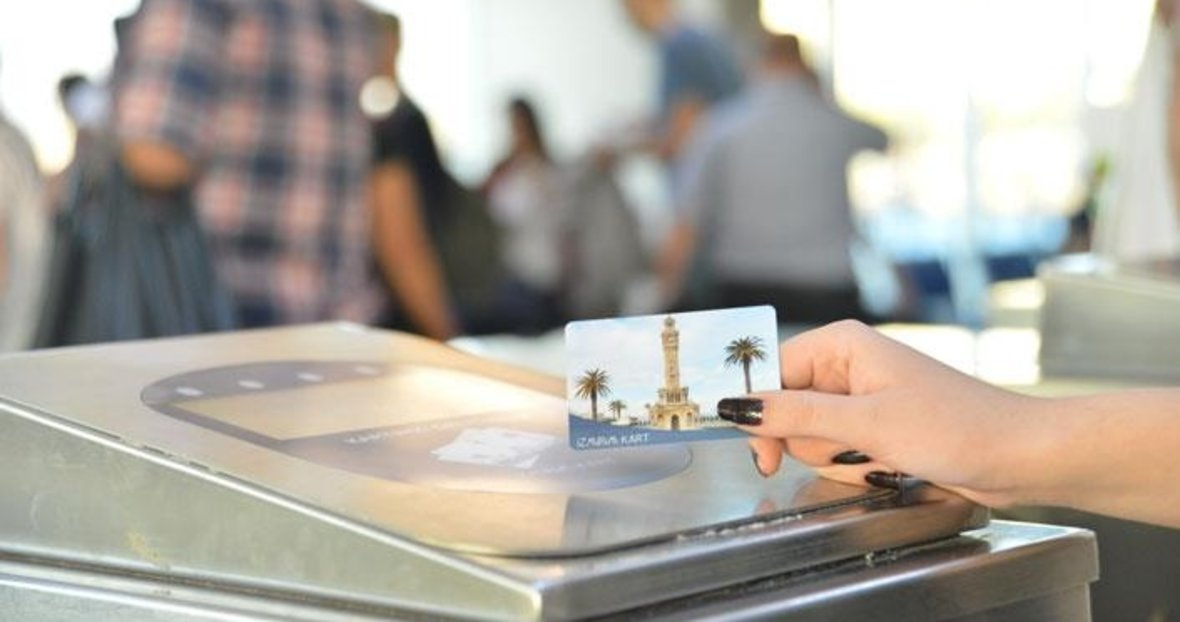

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk

In [2]:
df = pd.read_csv("izmirim_kart.csv")
df

,_id,DATE,INSTITUTION,FULL_FARE,STUDENT,TEACHER,SIXTY_YEARS_OLD,TICKET,CHILD,PERSONNEL,FREE
0,1,2021-01-01T00:00:00,Izdeniz,46,7,0,0,3,0,14,5
1,2,2021-01-01T00:00:00,Tramvay Konak,701,132,0,12,2,0,195,71
2,3,2021-01-01T00:00:00,Metro Maskematik,38,1,0,3,0,0,0,0
3,4,2021-01-01T00:00:00,Seferihisar Mot. Taş. Kooperat,221,24,0,5,0,0,43,30
4,5,2021-01-01T00:00:00,İzban,7297,1206,5,110,105,0,747,857
...,...,...,...,...,...,...,...,...,...,...,...
15667,15668,2023-08-20T00:00:00,İZTAŞIT KİRAZ,752,187,12,17,0,0,16,220
15668,15669,2023-08-20T00:00:00,IZTASIT MENEMEN,15957,8460,72,415,0,32,685,4540
15669,15670,2023-08-20T00:00:00,Izulas,46163,31490,257,2106,1,174,2608,25348
15670,15671,2023-08-20T00:00:00,Izdeniz,16477,6920,152,274,26,19,239,2179


# Data Cleaning

In [6]:
def n_time(date):
    
    date  = date[:10]
    
    return date
    
    

In [7]:
df["DATE"] = df["DATE"].apply(n_time)

df

,DATE,INSTITUTION,FULL_FARE,STUDENT,TEACHER,SIXTY_YEARS_OLD,TICKET,CHILD,PERSONNEL,FREE
0,2021-01-01,Izdeniz,46,7,0,0,3,0,14,5
1,2021-01-01,Tramvay Konak,701,132,0,12,2,0,195,71
2,2021-01-01,Metro Maskematik,38,1,0,3,0,0,0,0
3,2021-01-01,Seferihisar Mot. Taş. Kooperat,221,24,0,5,0,0,43,30
4,2021-01-01,İzban,7297,1206,5,110,105,0,747,857
...,...,...,...,...,...,...,...,...,...,...
15667,2023-08-20,İZTAŞIT KİRAZ,752,187,12,17,0,0,16,220
15668,2023-08-20,IZTASIT MENEMEN,15957,8460,72,415,0,32,685,4540
15669,2023-08-20,Izulas,46163,31490,257,2106,1,174,2608,25348
15670,2023-08-20,Izdeniz,16477,6920,152,274,26,19,239,2179


In [8]:
df['DATE'] = pd.to_datetime(df['DATE'])

df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
df['Day'] = df['DATE'].dt.day

df

,DATE,INSTITUTION,FULL_FARE,STUDENT,TEACHER,SIXTY_YEARS_OLD,TICKET,CHILD,PERSONNEL,FREE,Year,Month,Day
0,2021-01-01,Izdeniz,46,7,0,0,3,0,14,5,2021,1,1
1,2021-01-01,Tramvay Konak,701,132,0,12,2,0,195,71,2021,1,1
2,2021-01-01,Metro Maskematik,38,1,0,3,0,0,0,0,2021,1,1
3,2021-01-01,Seferihisar Mot. Taş. Kooperat,221,24,0,5,0,0,43,30,2021,1,1
4,2021-01-01,İzban,7297,1206,5,110,105,0,747,857,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15667,2023-08-20,İZTAŞIT KİRAZ,752,187,12,17,0,0,16,220,2023,8,20
15668,2023-08-20,IZTASIT MENEMEN,15957,8460,72,415,0,32,685,4540,2023,8,20
15669,2023-08-20,Izulas,46163,31490,257,2106,1,174,2608,25348,2023,8,20
15670,2023-08-20,Izdeniz,16477,6920,152,274,26,19,239,2179,2023,8,20


In [9]:
df["INSTITUTION"].unique()

array(['Izdeniz', 'Tramvay Konak', 'Metro Maskematik',
       'Seferihisar Mot. Taş. Kooperat', 'İzban', 'İzdeniz Maskematik',
       'Izulas', 'Metro', 'Tramvay Karşıyaka', 'Eshot', 'BİSİM',
       'İzmir BB - Atik Yönetimi DB', 'NOSTALJİK TRAMVAY',
       'İzmir Doğal Yaşam Parkı', 'İBB Bornova Buz Pisti', 'Teleferik',
       'Izfas', 'İBB Sebze ve Meyve Hali', 'İZTAŞIT KİRAZ',
       'Izdeniz-Araba', 'Grand Plaza A.Ş ', 'IZTASIT MENEMEN',
       'IZTASIT FOCA', 'IZTASIT KAYMAKCI'], dtype=object)

In [10]:
values_to_delete = ['Metro Maskematik',
       'Seferihisar Mot. Taş. Kooperat', 'İzdeniz Maskematik',
       'Izulas', 
        'İzmir BB - Atik Yönetimi DB', 'NOSTALJİK TRAMVAY',
       'İzmir Doğal Yaşam Parkı', 'İBB Bornova Buz Pisti',
       'Izfas', 'İBB Sebze ve Meyve Hali', 'İZTAŞIT KİRAZ',
       'Izdeniz-Araba', 'Grand Plaza A.Ş ', 'IZTASIT MENEMEN',
       'IZTASIT FOCA', 'IZTASIT KAYMAKCI']


filt_df = df[~df['INSTITUTION'].isin(values_to_delete)]

filt_df

filt_df

,DATE,INSTITUTION,FULL_FARE,STUDENT,TEACHER,SIXTY_YEARS_OLD,TICKET,CHILD,PERSONNEL,FREE,Year,Month,Day
0,2021-01-01,Izdeniz,46,7,0,0,3,0,14,5,2021,1,1
1,2021-01-01,Tramvay Konak,701,132,0,12,2,0,195,71,2021,1,1
4,2021-01-01,İzban,7297,1206,5,110,105,0,747,857,2021,1,1
7,2021-01-01,Metro,4992,1014,0,112,50,0,598,568,2021,1,1
8,2021-01-01,Tramvay Karşıyaka,146,28,0,4,0,0,25,9,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15663,2023-08-20,Tramvay Karşıyaka,7028,5928,92,198,0,6,245,2080,2023,8,20
15664,2023-08-20,Teleferik,248,91,4,2,0,0,0,0,2023,8,20
15665,2023-08-20,Eshot,182499,124181,1554,8439,0,480,10504,97008,2023,8,20
15666,2023-08-20,Metro,58550,39981,589,1838,0,64,2215,14357,2023,8,20


In [11]:
izban_df_2021 = filt_df[(filt_df["INSTITUTION"] == "İzban") & (filt_df["Year"] == 2021)].reset_index()
izban_df_2022 = filt_df[(filt_df["INSTITUTION"] == "İzban") & (filt_df["Year"] == 2022)].reset_index()
izban_df_2023 = filt_df[(filt_df["INSTITUTION"] == "İzban") & (filt_df["Year"] == 2023)].reset_index()

izban_df_2021 = izban_df_2021.drop("index", axis=1)
izban_df_2022 = izban_df_2022.drop("index", axis=1)
izban_df_2023 = izban_df_2023.drop("index", axis=1)


In [12]:
izban_df_2021

,DATE,INSTITUTION,FULL_FARE,STUDENT,TEACHER,SIXTY_YEARS_OLD,TICKET,CHILD,PERSONNEL,FREE,Year,Month,Day
0,2021-01-01,İzban,7297,1206,5,110,105,0,747,857,2021,1,1
1,2021-01-02,İzban,10924,1893,12,153,96,0,805,1026,2021,1,2
2,2021-01-03,İzban,9175,1531,10,118,152,0,713,912,2021,1,3
3,2021-01-04,İzban,84944,18475,633,2130,333,0,3395,6925,2021,1,4
4,2021-01-05,İzban,77359,17319,583,2107,250,0,2987,6346,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,İzban,122740,65627,2402,3679,283,3,4929,27313,2021,12,27
361,2021-12-28,İzban,122904,65532,2379,3633,270,6,4973,26870,2021,12,28
362,2021-12-29,İzban,120059,64479,2460,3253,261,4,5010,24464,2021,12,29
363,2021-12-30,İzban,125326,66804,2415,3446,398,1,5275,26007,2021,12,30


# İzban Usage in 2021

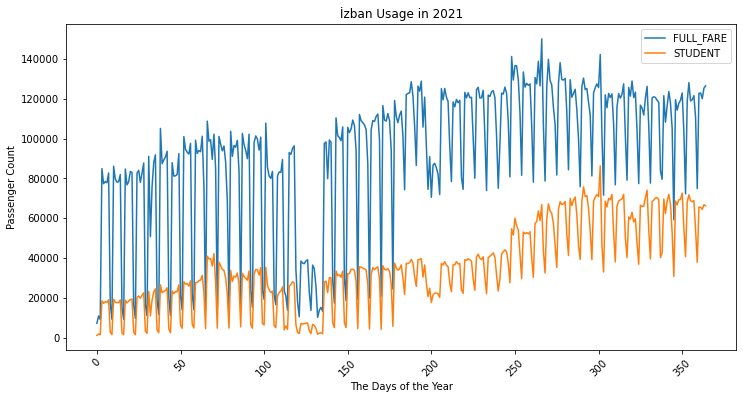

In [13]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= izban_df_2021.index , y='FULL_FARE', data=izban_df_2021, label='FULL_FARE')
sns.lineplot(x= izban_df_2021.index , y='STUDENT', data=izban_df_2021, label='STUDENT')


plt.title('İzban Usage in 2021')
plt.xlabel('The Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# İzban Usage in 2022

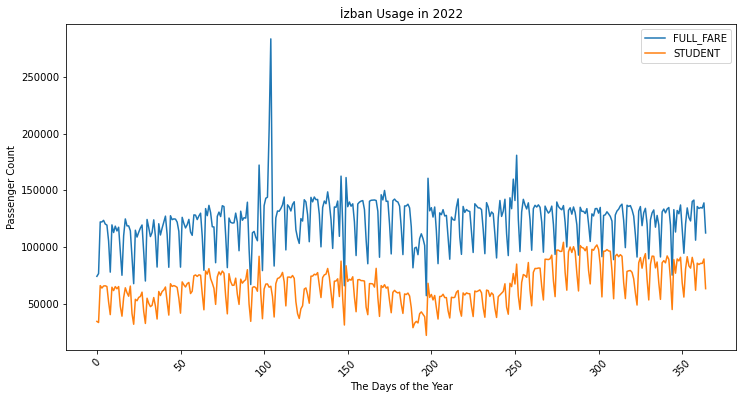

In [14]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= izban_df_2022.index , y='FULL_FARE', data=izban_df_2022, label='FULL_FARE')
sns.lineplot(x= izban_df_2022.index , y='STUDENT', data=izban_df_2022, label='STUDENT')


plt.title('İzban Usage in 2022')
plt.xlabel('The Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# İzban Usage in 2023

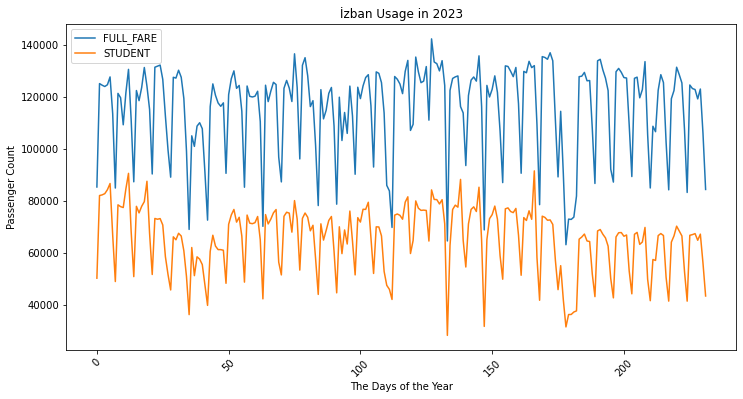

In [15]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= izban_df_2023.index , y='FULL_FARE', data=izban_df_2023, label='FULL_FARE')
sns.lineplot(x= izban_df_2023.index , y='STUDENT', data=izban_df_2023, label='STUDENT')


plt.title('İzban Usage in 2023')
plt.xlabel('The Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# 2021 vs 2022 for İzban ("Full Fare")

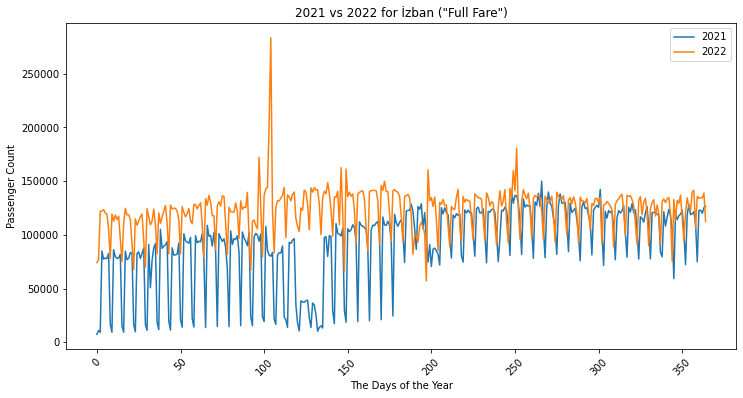

In [16]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= izban_df_2021.index , y='FULL_FARE', data=izban_df_2021, label='2021')
sns.lineplot(x= izban_df_2022.index , y='FULL_FARE', data=izban_df_2022, label='2022')


plt.title('2021 vs 2022 for İzban ("Full Fare")')
plt.xlabel('The Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# İzban usage in Months

In [47]:
ty_df = izban_df_2021.copy()
tp_df = izban_df_2022.copy()
tk_df = izban_df_2023.copy()

a_dict  = {1 : "January",2 : "February",
           3 : "March" , 4 : "April",
           5 : "May" , 6 : "June" ,
           7 : "July" , 8 : "August" ,
           9 : "September" , 10 : "October" ,
           11 : "November" , 12 : "December"}

def arrange_month(month):
    
    return a_dict[month]


ty_df["Month"] = ty_df["Month"].apply(arrange_month)

tp_df["Month"] = tp_df["Month"].apply(arrange_month)

tk_df["Month"] = tk_df["Month"].apply(arrange_month)

In [19]:


#groupped_df = ty_df.groupby("Month").sum()
tp = tp_df.groupby("Month").sum()
tk = tk_df.groupby("Month").sum()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#df_sorted = groupped_df.loc[month_order]
tp_2022 = tp.loc[month_order]






In [20]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= df_sorted.index , y='FULL_FARE', data=df_sorted, label='FULL_FARE')
sns.lineplot(x= df_sorted.index , y='STUDENT', data=df_sorted, label='STUDENT')


plt.title('İzban Usage in 2021')
plt.xlabel('Months')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

NameError: name 'df_sorted' is not defined

<Figure size 864x432 with 0 Axes>

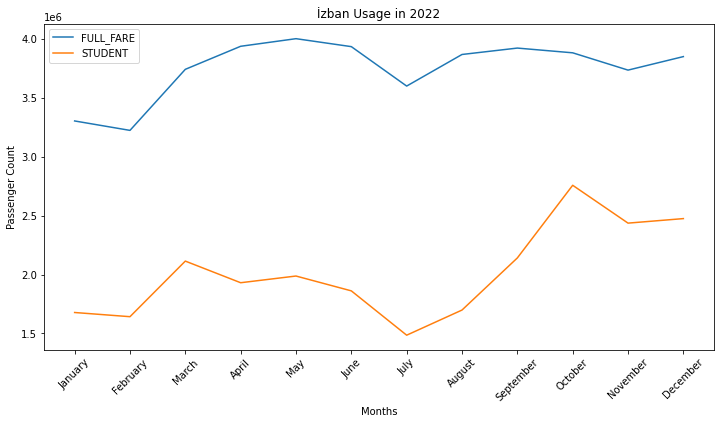

In [37]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= df_sorted.index , y='FULL_FARE', data=tp_2022, label='FULL_FARE')
sns.lineplot(x= df_sorted.index , y='STUDENT', data=tp_2022, label='STUDENT')


plt.title('İzban Usage in 2022')
plt.xlabel('Months')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

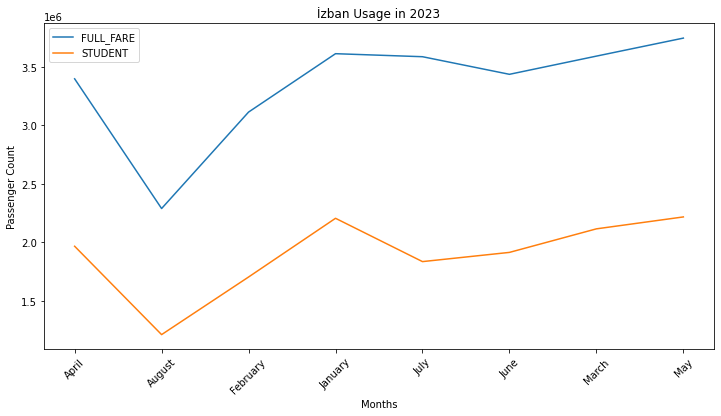

In [21]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= tk.index , y='FULL_FARE', data=tk, label='FULL_FARE')
sns.lineplot(x= tk.index , y='STUDENT', data=tk, label='STUDENT')


plt.title('İzban Usage in 2023')
plt.xlabel('Months')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

In [22]:
metro_2021 = filt_df[(filt_df["INSTITUTION"] == "Metro") & (filt_df["Year"] == 2021)].reset_index()
metro_2022 = filt_df[(filt_df["INSTITUTION"] == "Metro") & (filt_df["Year"] == 2022)].reset_index()
metro_2023 = filt_df[(filt_df["INSTITUTION"] == "Metro") & (filt_df["Year"] == 2023)].reset_index()

metro_2021 = metro_2021.drop("index", axis=1)
metro_2022 = metro_2022.drop("index", axis=1)
metro_2023 = metro_2023.drop("index", axis=1)

metro_2021

,DATE,INSTITUTION,FULL_FARE,STUDENT,TEACHER,SIXTY_YEARS_OLD,TICKET,CHILD,PERSONNEL,FREE,Year,Month,Day
0,2021-01-01,Metro,4992,1014,0,112,50,0,598,568,2021,1,1
1,2021-01-02,Metro,7346,1389,6,180,56,0,628,704,2021,1,2
2,2021-01-03,Metro,5962,1126,6,131,55,0,535,577,2021,1,3
3,2021-01-04,Metro,87419,20558,597,3265,441,0,4264,6776,2021,1,4
4,2021-01-05,Metro,84979,19870,649,3070,479,0,4038,6502,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,Metro,136547,94792,2348,5136,373,18,6873,31459,2021,12,27
361,2021-12-28,Metro,142227,97215,2491,5297,430,18,7464,31709,2021,12,28
362,2021-12-29,Metro,132072,92115,2565,4561,319,15,7000,27303,2021,12,29
363,2021-12-30,Metro,130486,90750,2260,4459,427,14,6655,27092,2021,12,30


# Metro Usage in 2021

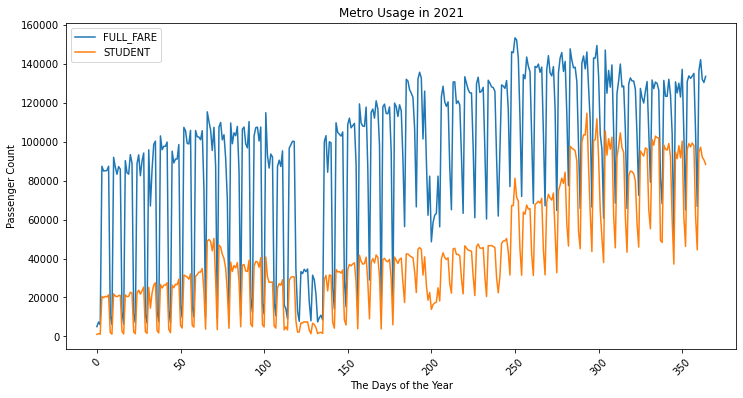

In [23]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= metro_2021.index , y='FULL_FARE', data=metro_2021, label='FULL_FARE')
sns.lineplot(x= metro_2021.index , y='STUDENT', data=metro_2021, label='STUDENT')


plt.title('Metro Usage in 2021')
plt.xlabel('The Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# Metro Usage in 2022

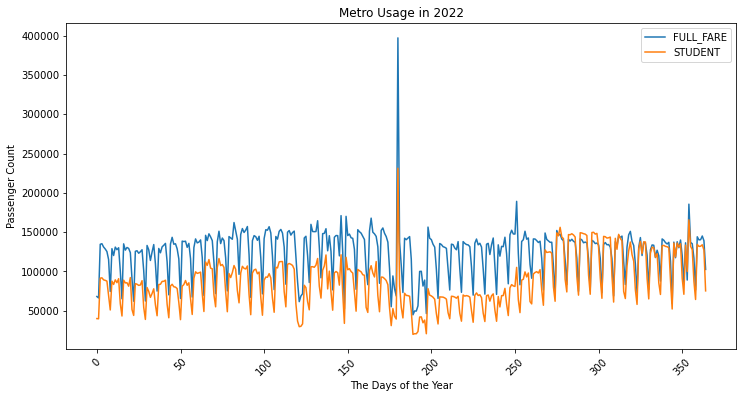

In [24]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= metro_2022.index , y='FULL_FARE', data=metro_2022, label='FULL_FARE')
sns.lineplot(x= metro_2022.index , y='STUDENT', data=metro_2022, label='STUDENT')


plt.title('Metro Usage in 2022')
plt.xlabel('The Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# Metro Usage in 2023

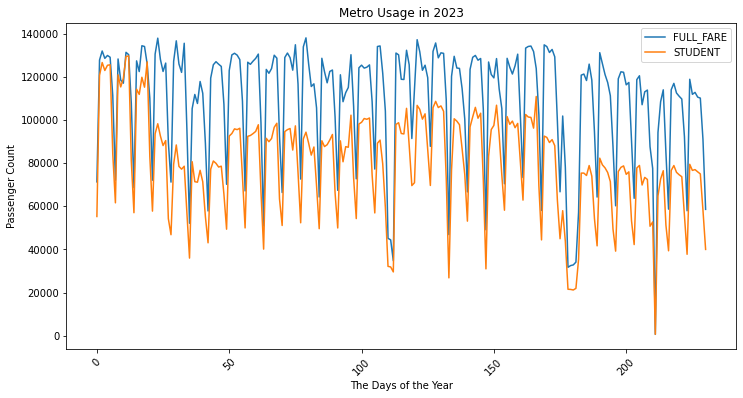

In [25]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= metro_2023.index , y='FULL_FARE', data=metro_2023, label='FULL_FARE')
sns.lineplot(x= metro_2023.index , y='STUDENT', data=metro_2023, label='STUDENT')


plt.title('Metro Usage in 2023')
plt.xlabel('The Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# 2021 vs 2022 in Metro

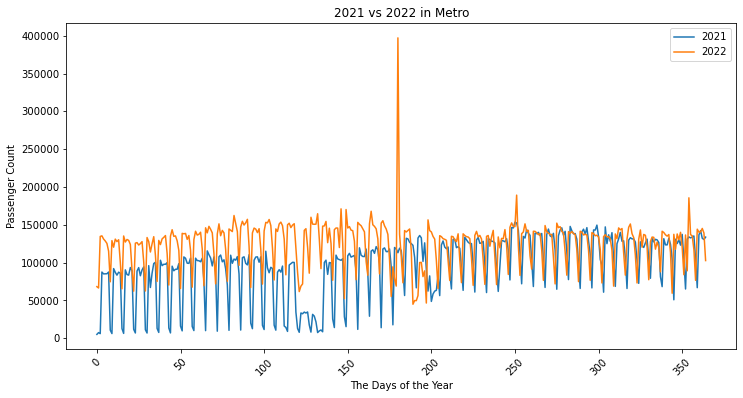

In [51]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= metro_2021.index , y='FULL_FARE', data=metro_2021, label='2021')
sns.lineplot(x= metro_2022.index , y='FULL_FARE', data=metro_2022, label='2022')



plt.title('2021 vs 2022 in Metro')
plt.xlabel('The Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# Metro usage in Months

In [26]:
mt2021 = metro_2021.copy()
mt2022 = metro_2022.copy()
mt2023 = metro_2023.copy()

a_dict  = {1 : "January",2 : "February",
           3 : "March" , 4 : "April",
           5 : "May" , 6 : "June" ,
           7 : "July" , 8 : "August" ,
           9 : "September" , 10 : "October" ,
           11 : "November" , 12 : "December"}

def arrange_month(month):
    
    return a_dict[month]


mt2021["Month"] = mt2021["Month"].apply(arrange_month)

mt2022["Month"] = mt2022["Month"].apply(arrange_month)



In [27]:

m2021 = mt2021.groupby("Month").sum()
m2022 = mt2022.groupby("Month").sum()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


m_2021 = m2021.loc[month_order]
m_2022 = m2022.loc[month_order]





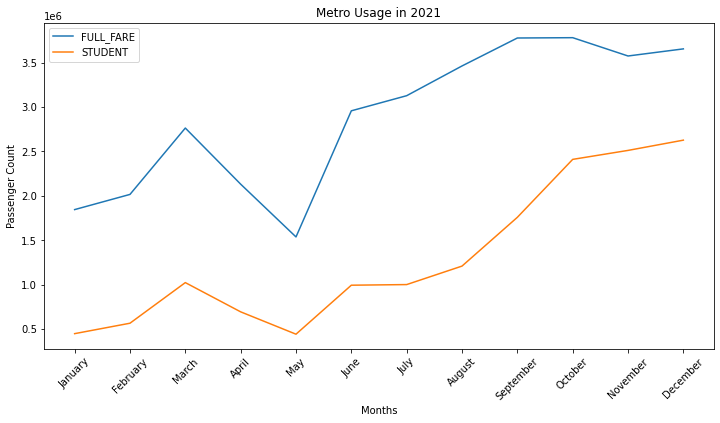

In [62]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= m_2021.index , y='FULL_FARE', data=m_2021, label='FULL_FARE')
sns.lineplot(x= m_2021.index , y='STUDENT', data=m_2021, label='STUDENT')


plt.title('Metro Usage in 2021')
plt.xlabel('Months')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

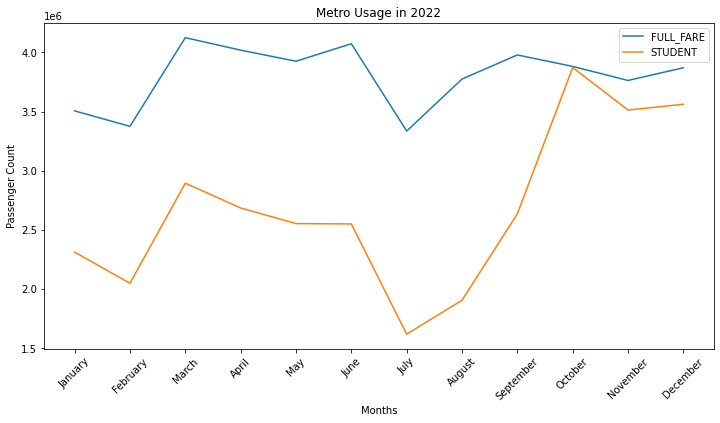

In [63]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= m_2022.index , y='FULL_FARE', data=m_2022, label='FULL_FARE')
sns.lineplot(x= m_2022.index , y='STUDENT', data=m_2022, label='STUDENT')


plt.title('Metro Usage in 2022')
plt.xlabel('Months')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

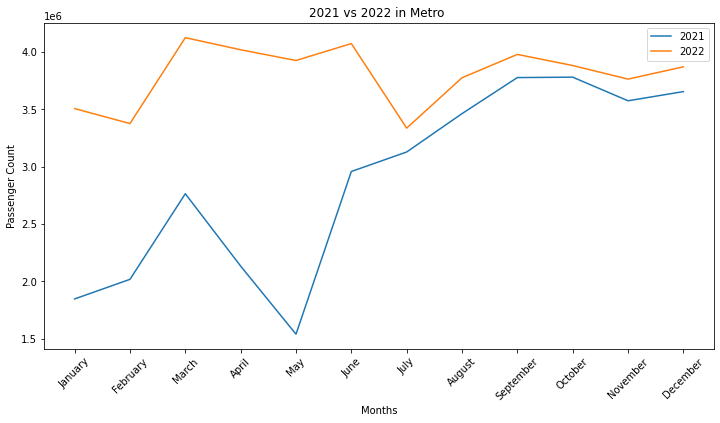

In [64]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= m_2021.index , y='FULL_FARE', data=m_2021, label='2021')
sns.lineplot(x= m_2022.index , y='FULL_FARE', data=m_2022, label='2022')


plt.title('2021 vs 2022 in Metro ')
plt.xlabel('Months')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# Eshot Usage in 2021

In [28]:
eshot_2021 = filt_df[(filt_df["INSTITUTION"] == "Eshot") & (filt_df["Year"] == 2021)].reset_index()
eshot_2022 = filt_df[(filt_df["INSTITUTION"] == "Eshot") & (filt_df["Year"] == 2022)].reset_index()
eshot_2023 = filt_df[(filt_df["INSTITUTION"] == "Eshot") & (filt_df["Year"] == 2023)].reset_index()

eshot_2021 = eshot_2021.drop("index", axis=1)
eshot_2022 = eshot_2022.drop("index", axis=1)
eshot_2023 = eshot_2023.drop("index", axis=1)

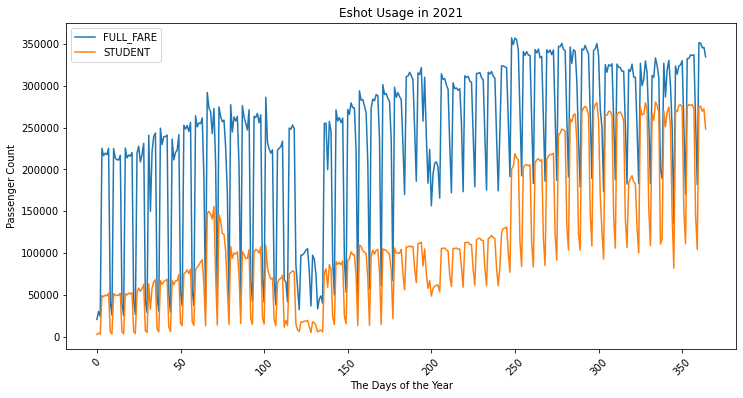

In [29]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= eshot_2021.index , y='FULL_FARE', data=eshot_2021, label='FULL_FARE')
sns.lineplot(x= eshot_2021.index , y='STUDENT', data=eshot_2021, label='STUDENT')


plt.title('Eshot Usage in 2021')
plt.xlabel('The Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# Eshot Usage in 2022

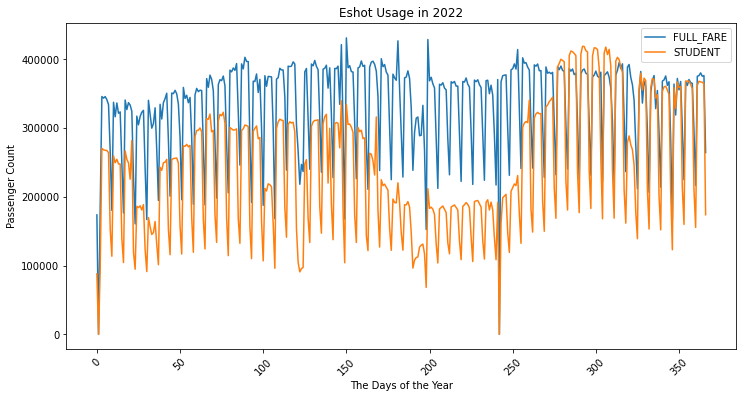

In [67]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= eshot_2022.index , y='FULL_FARE', data=eshot_2022, label='FULL_FARE')
sns.lineplot(x= eshot_2022.index , y='STUDENT', data=eshot_2022, label='STUDENT')


plt.title('Eshot Usage in 2022')
plt.xlabel('The Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# Eshot Usage in 2023

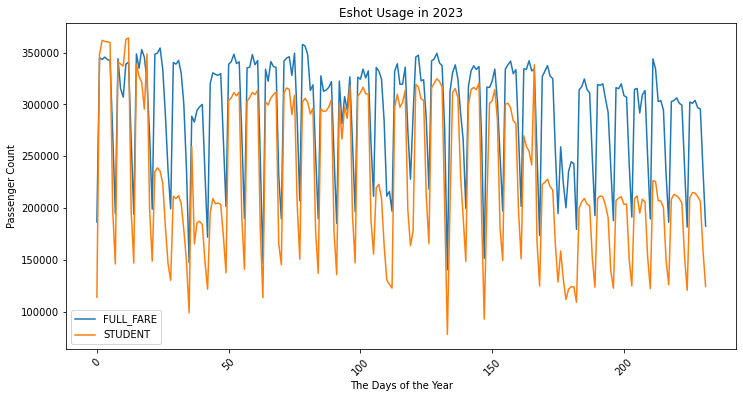

In [68]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= eshot_2023.index , y='FULL_FARE', data=eshot_2023, label='FULL_FARE')
sns.lineplot(x= eshot_2023.index , y='STUDENT', data=eshot_2023, label='STUDENT')


plt.title('Eshot Usage in 2023')
plt.xlabel('The Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# 2021 vs 2022 For Eshot

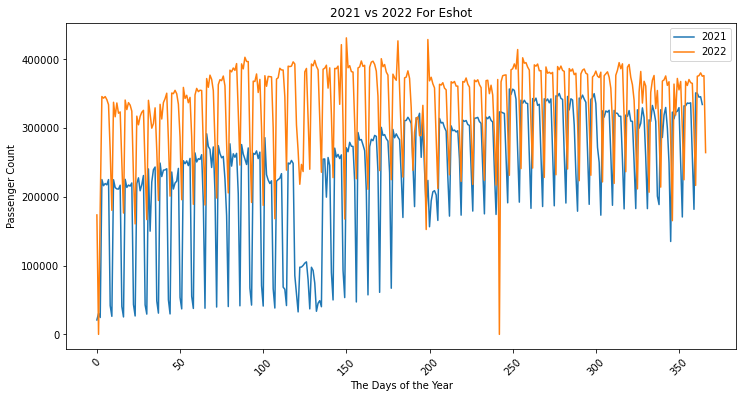

In [69]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= eshot_2021.index , y='FULL_FARE', data=eshot_2021, label='2021')
sns.lineplot(x= eshot_2022.index , y='FULL_FARE', data=eshot_2022, label='2022')


plt.title('2021 vs 2022 For Eshot')
plt.xlabel('The Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# Eshot usage in months

In [30]:
es2021 = eshot_2021.copy()
es2022 = eshot_2022.copy()
es2023 = eshot_2023.copy()



es2021["Month"] = es2021["Month"].apply(arrange_month)

es2022["Month"] = es2022["Month"].apply(arrange_month)

es2023["Month"] = es2023["Month"].apply(arrange_month)


In [31]:
e2021 = es2021.groupby("Month").sum()
e2022 = es2022.groupby("Month").sum()
e2023 = es2023.groupby("Month").sum()

e_2021 = e2021.loc[month_order]
e_2022 = e2022.loc[month_order]



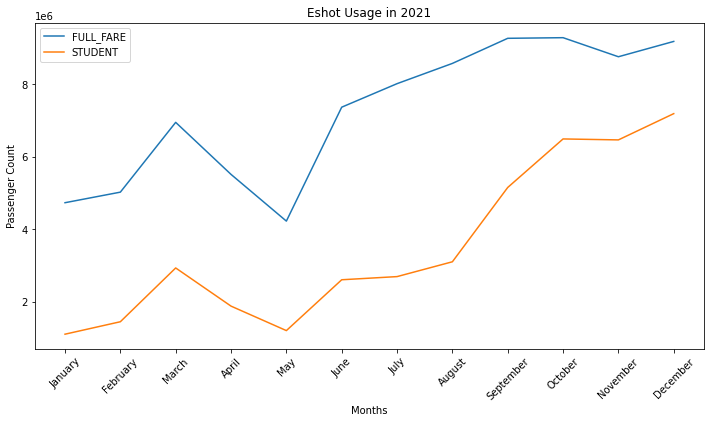

In [73]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= e_2021.index , y='FULL_FARE', data=e_2021, label='FULL_FARE')
sns.lineplot(x= e_2021.index , y='STUDENT', data=e_2021, label='STUDENT')


plt.title('Eshot Usage in 2021')
plt.xlabel('Months')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

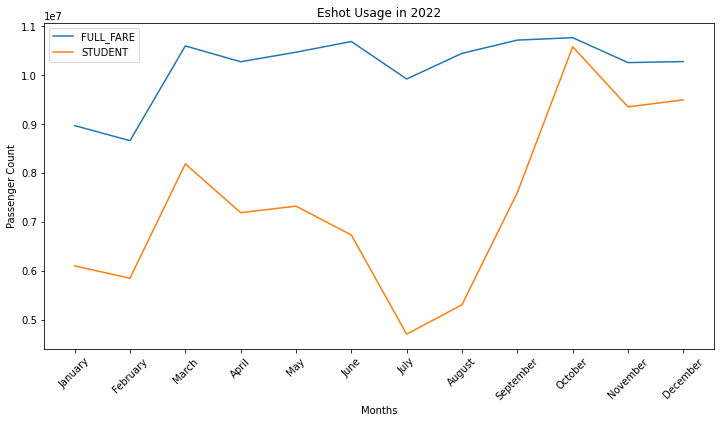

In [84]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= e_2022.index , y='FULL_FARE', data=e_2022, label='FULL_FARE')
sns.lineplot(x= e_2022.index , y='STUDENT', data=e_2022, label='STUDENT')


plt.title('Eshot Usage in 2022')
plt.xlabel('Months')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

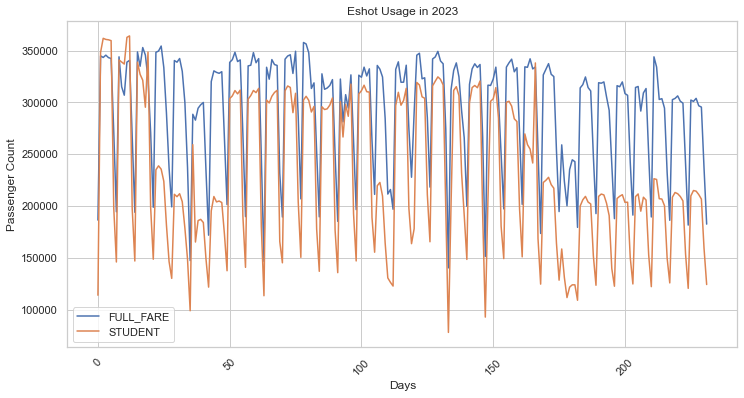

In [91]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= es2023.index , y='FULL_FARE', data=es2023, label='FULL_FARE')
sns.lineplot(x= es2023.index , y='STUDENT', data=es2023, label='STUDENT')


plt.title('Eshot Usage in 2023')
plt.xlabel('Days')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# İzban VS Metro in 2021

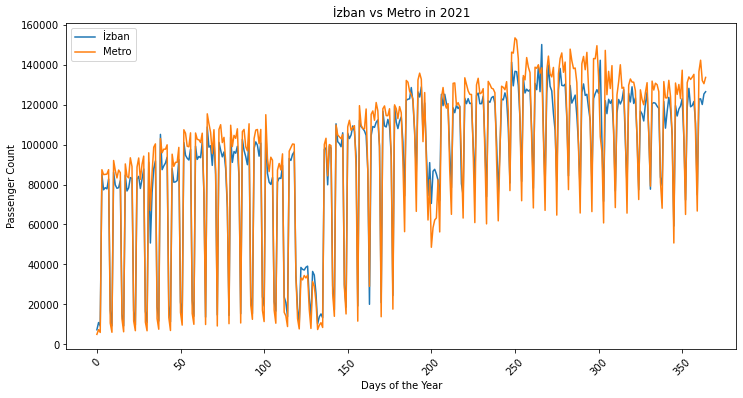

In [37]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= izban_df_2021.index , y='FULL_FARE', data= izban_df_2021, label='İzban')      
sns.lineplot(x= metro_2021.index , y='FULL_FARE', data=metro_2021, label='Metro')


plt.title('İzban vs Metro in 2021')
plt.xlabel('Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# İzban vs Metro in 2022

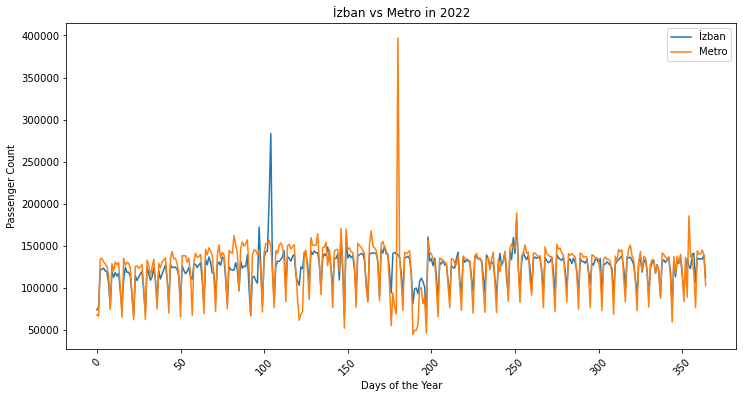

In [38]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= izban_df_2022.index , y='FULL_FARE', data= izban_df_2022, label='İzban')      
sns.lineplot(x= metro_2022.index , y='FULL_FARE', data=metro_2022, label='Metro')


plt.title('İzban vs Metro in 2022')
plt.xlabel('Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# İzban vs Metro in 2023

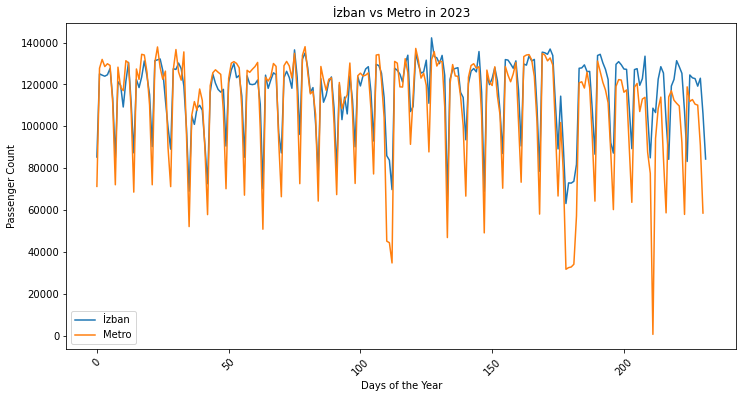

In [39]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= izban_df_2023.index , y='FULL_FARE', data= izban_df_2023, label='İzban')      
sns.lineplot(x= metro_2023.index , y='FULL_FARE', data=metro_2023, label='Metro')


plt.title('İzban vs Metro in 2023')
plt.xlabel('Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# İzban vs Eshot in 2021 , 2022 and 2023

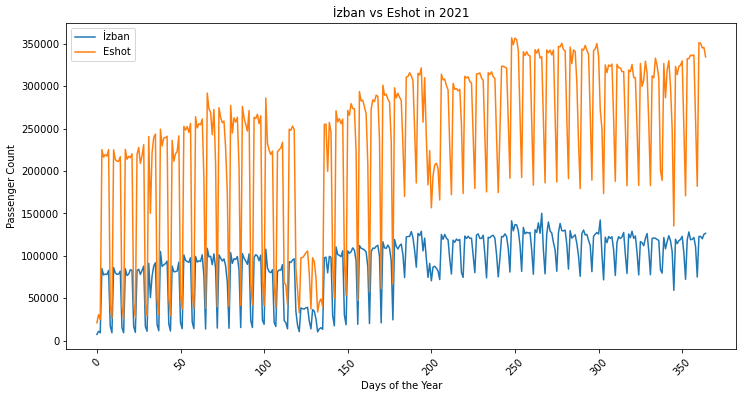

In [41]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= izban_df_2021.index , y='FULL_FARE', data= izban_df_2021, label='İzban')      
sns.lineplot(x= eshot_2021.index , y='FULL_FARE', data=eshot_2021, label='Eshot')


plt.title('İzban vs Eshot in 2021')
plt.xlabel('Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

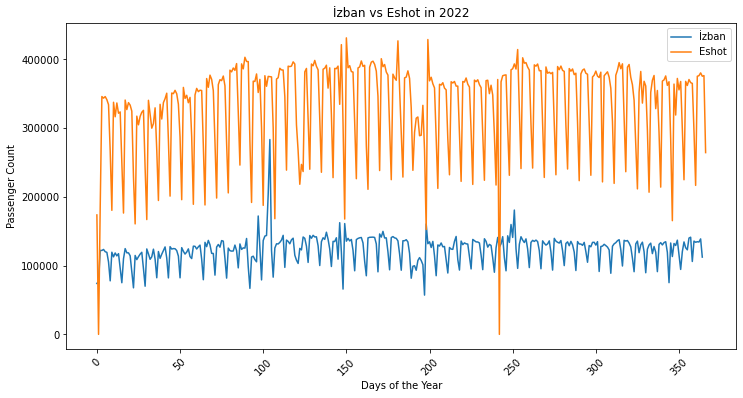

In [42]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= izban_df_2022.index , y='FULL_FARE', data= izban_df_2022, label='İzban')      
sns.lineplot(x= eshot_2022.index , y='FULL_FARE', data=eshot_2022, label='Eshot')


plt.title('İzban vs Eshot in 2022')
plt.xlabel('Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

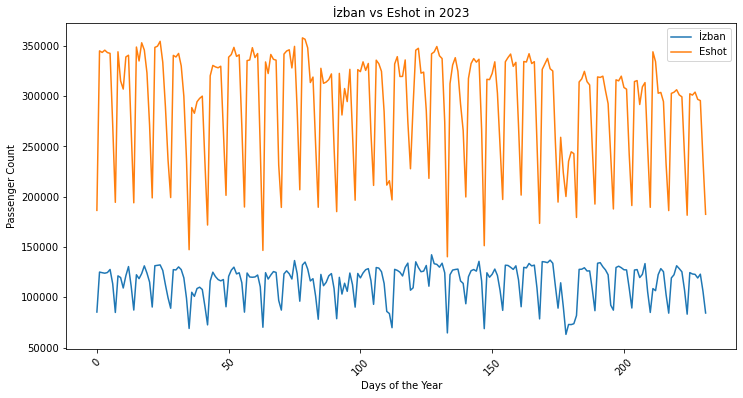

In [43]:
plt.figure(figsize=(12, 6))


sns.lineplot(x= izban_df_2023.index , y='FULL_FARE', data= izban_df_2023, label='İzban')      
sns.lineplot(x= eshot_2023.index , y='FULL_FARE', data=eshot_2023, label='Eshot')


plt.title('İzban vs Eshot in 2023')
plt.xlabel('Days of the Year')
plt.ylabel('Passenger Count')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# İzban vs Metro vs Eshot in 2021 

In [58]:

izbandf = ty_df.groupby("Month").sum()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

izbar  = izbandf.loc[month_order]

deleteds = ["TEACHER","SIXTY_YEARS_OLD","TICKET","CHILD","PERSONNEL","FREE","Year","Day"]

izbar = izbar.drop(deleteds , axis = 1)

izbar

,FULL_FARE,STUDENT
Month,,
January,1759316,403730
February,1899837,513827
March,2606344,883483
April,2051192,619532
May,1596920,429556
June,2864533,891780
July,3268910,965206
August,3411024,1092096
September,3634853,1511388


In [60]:
m_2021 = m_2021.drop(deleteds , axis = 1)

m_2021

,FULL_FARE,STUDENT
Month,,
January,1845152,449395
February,2016050,566705
March,2762715,1023746
April,2131505,694771
May,1537646,443299
June,2956653,994491
July,3126759,1001525
August,3461385,1209520
September,3775940,1758322


In [61]:
e_2021 = e_2021.drop(deleteds , axis = 1)

e_2021

,FULL_FARE,STUDENT
Month,,
January,4732367,1103344
February,5024004,1446972
March,6950299,2931484
April,5513940,1878080
May,4224747,1202454
June,7369016,2605615
July,8018144,2692837
August,8577206,3102044
September,9269975,5153066


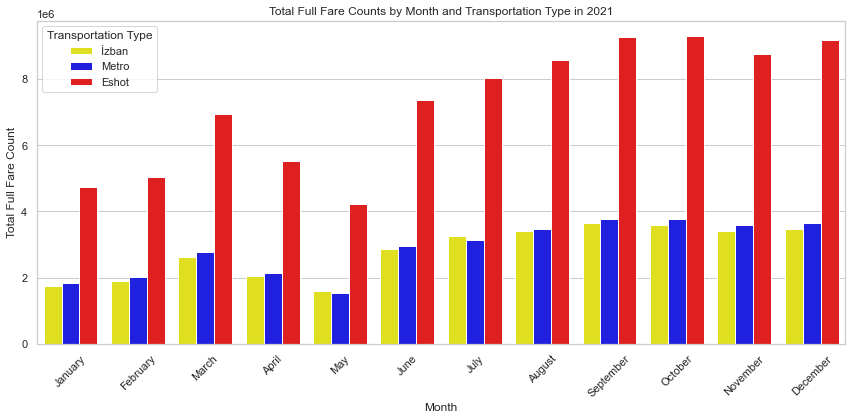

In [73]:

# Combine the individual dataframes into one dataframe
combined_df = pd.concat([izbar, m_2021, e_2021], keys=['İzban', 'Metro', 'Eshot'], names=['TransportationType'])

# Reset the index to make 'Month' a regular column
combined_df.reset_index(inplace=True)

custom_palette = {'İzban': 'yellow', 'Metro': 'blue', 'Eshot': 'red'}

# Set the style of the plot
sns.set(style="whitegrid")

# Create the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='FULL_FARE', hue='TransportationType', data=combined_df, palette=custom_palette)

# Customize the plot
plt.title('Total Full Fare Counts by Month and Transportation Type in 2021')
plt.xlabel('Month')
plt.ylabel('Total Full Fare Count')
plt.legend(title='Transportation Type')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# İzban vs Metro vs Eshot in 2022

In [72]:
m_2022 = m_2022.drop(deleteds , axis = 1)
e_2022 = e_2022.drop(deleteds , axis = 1)
tp_2022 = tp_2022.drop(deleteds , axis = 1)


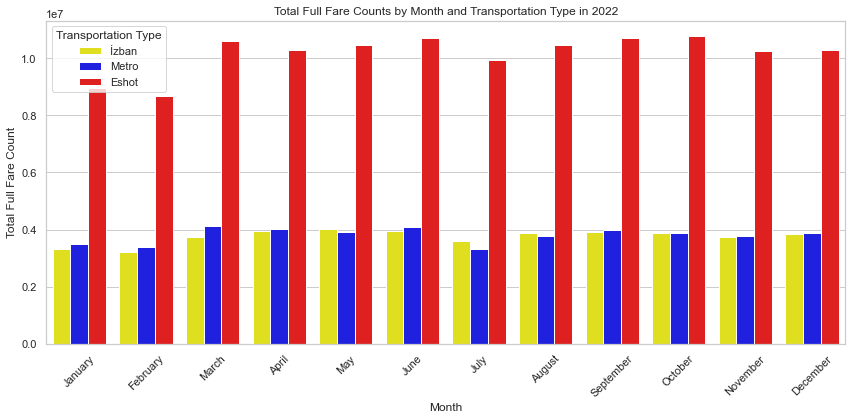

In [74]:

combined_df = pd.concat([tp_2022, m_2022, e_2022], keys=['İzban', 'Metro', 'Eshot'], names=['TransportationType'])


combined_df.reset_index(inplace=True)

custom_palette = {'İzban': 'yellow', 'Metro': 'blue', 'Eshot': 'red'}

sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='FULL_FARE', hue='TransportationType', data=combined_df, palette=custom_palette)


plt.title('Total Full Fare Counts by Month and Transportation Type in 2022')
plt.xlabel('Month')
plt.ylabel('Total Full Fare Count')
plt.legend(title='Transportation Type')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 # Passanger Count Finder

In [78]:
filt_df = filt_df[(filt_df["INSTITUTION"] == "İzban")  | (filt_df["INSTITUTION"] == "Metro")  | (filt_df["INSTITUTION"] == "Eshot") ]

In [87]:
b_df = filt_df.drop("level_0" , axis = 1)

b_df

,index,DATE,INSTITUTION,FULL_FARE,STUDENT,Year,Month,Day
0,0,2021-01-01,İzban,7297,1206,2021,1,1
1,1,2021-01-01,Metro,4992,1014,2021,1,1
2,2,2021-01-01,Eshot,20972,3159,2021,1,1
3,3,2021-01-02,Eshot,30506,4524,2021,1,2
4,4,2021-01-02,Metro,7346,1389,2021,1,2
...,...,...,...,...,...,...,...,...
2882,2882,2023-08-19,Eshot,236806,159264,2023,8,19
2883,2883,2023-08-19,İzban,105983,56074,2023,8,19
2884,2884,2023-08-20,İzban,84370,43417,2023,8,20
2885,2885,2023-08-20,Eshot,182499,124181,2023,8,20


In [89]:
def calculate_passenger_count():
    selected_date = date_entry.get()
    selected_institution = institution_var.get()
    selected_ticket_type = ticket_type_var.get()

    # Filter the DataFrame based on user's selections
    filter_df = b_df[(b_df['DATE'] == selected_date) &
                     (b_df['INSTITUTION'] == selected_institution) &
                     (b_df[selected_ticket_type] > 0)]

    total_passengers = filter_df[selected_ticket_type].sum()
    
    result_label.config(text=f"Total Passengers: {total_passengers}")

In [90]:
# Create the main window
root = tk.Tk()
root.title("Passenger Count Calculator")

# Create labels and entry fields for user input
date_label = tk.Label(root, text="Select Date:")
date_label.pack()
date_entry = tk.Entry(root)
date_entry.pack()

institution_label = tk.Label(root, text="Select Transportation Type:")
institution_label.pack()
institutions = b_df['INSTITUTION'].unique()
institution_var = tk.StringVar(root)
institution_var.set(institutions[0])
institution_menu = tk.OptionMenu(root, institution_var, *institutions)
institution_menu.pack()

ticket_type_label = tk.Label(root, text="Select Ticket Type:")
ticket_type_label.pack()
ticket_types = ["FULL_FARE", "STUDENT"]
ticket_type_var = tk.StringVar(root)
ticket_type_var.set(ticket_types[0])
ticket_type_menu = tk.OptionMenu(root, ticket_type_var, *ticket_types)
ticket_type_menu.pack()

# Create a button to calculate and display the result
calculate_button = tk.Button(root, text="Calculate", command=calculate_passenger_count)
calculate_button.pack()

# Create a label to display the result
result_label = tk.Label(root, text="")
result_label.pack()

# Start the tkinter main loop
root.mainloop()